In [2]:
from chemwalker.gnps import Proteosafe
from chemwalker.utils import run_metfrag, walk_conn_comp, val_known
from chemwalker.draw import *
import pandas as pd
import numpy as np

In [3]:
taskid = 'be5004d4dd394fe8b883633fd75ea732'

gnps_result = Proteosafe(taskid, 'V2')
gnps_result.get_gnps()
net = gnps_result.net
gnps_tab = gnps_result.gnps
spectra = gnps_result.spectra
match_tab = gnps_result.dbmatch

In [4]:
net.head()

,CLUSTERID1,CLUSTERID2,DeltaMZ,MEH,Cosine,OtherScore,ComponentIndex,EdgeAnnotation
0,549,574,0.000,549.0,0.9488,549.0,1,
1,10,574,-15.995,10.0,0.8224,10.0,1,
2,10,549,-15.995,10.0,0.7616,10.0,1,
3,2,390,-84.147,2.0,0.8661,2.0,3,
4,1,2,-42.967,1.0,0.9744,1.0,3,


In [6]:
gnps_tab.head()

,AllGroups,DefaultGroups,EvenOdd,G1,G2,G3,G4,G5,G6,GNPSLinkout_Cluster,...,SpectrumID,UniqueFileSources,UniqueFileSourcesCount,cluster index,componentindex,number of spectra,parent mass,precursor charge,precursor mass,sum(precursor intensity)
0,,G1,1,1,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,CCMSLIB00003153831,gnps_net_filtered_net1.mgf,1,1,3,1,319.086,1,319.086,0
1,,G1,0,1,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,CCMSLIB00003153832,gnps_net_filtered_net1.mgf,1,2,3,1,362.053,1,362.053,0
2,,G1,1,1,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,CCMSLIB00003153833,gnps_net_filtered_net1.mgf,1,3,3,1,311.027,1,311.027,0
3,,G1,1,1,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,gnps_net_filtered_net1.mgf,1,4,55,1,393.135,1,393.135,0
4,,G1,1,1,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,CCMSLIB00003153946,gnps_net_filtered_net1.mgf,1,5,94,1,310.216,1,310.216,0


In [7]:
gnps_tab.shape

(610, 28)

In [8]:
len(spectra)

610

In [9]:
spectra[0]

{'params': {'pepmass': (319.08591, None),
  'charge': [1],
  'mslevel': '2',
  'filename': 'spec-00000.mgf',
  'instrument': 'ion trap',
  'title': 'Scan Number: 1',
  'scans': '1'},
 'm/z array': array([ 94., 141., 153., 180., 181., 185.]),
 'intensity array': array([  2.,   3., 111.,   3., 999.,   1.]),
 'charge array': masked_array(data=[--, --, --, --, --, --],
              mask=[ True,  True,  True,  True,  True,  True],
        fill_value=0,
             dtype=int64)}

In [10]:
db = pd.read_csv('validation_db.psv', sep='|')
nist = pd.read_csv('nist17_selected_db_ccms.txt', sep='\t')
db = pd.concat([db, nist]).reset_index(drop=True)
db.head()

,MonoisotopicMass,InChI,SMILES,Identifier,InChIKey2,InChIKey1,MolecularFormula,kingdom_name,superclass_name,class_name,subclass_name
0,194.05791,InChI=1/C10H10O4/c1-14-9-6-7(2-4-8(9)11)3-5-10...,COC1=C(C=CC(=C1)C=CC(=O)O)O,CCMSLIB00000220714,UHFFFAOYSA,KSEBMYQBYZTDHS,C10H10O4,Organic compounds,Phenylpropanoids and polyketides,Cinnamic acids and derivatives,Hydroxycinnamic acids and derivatives
1,176.09496,InChI=1/C10H12N2O/c11-4-3-7-6-12-10-2-1-8(13)5...,C1=CC2=C(C=C1O)C(=CN2)CCN,CCMSLIB00000220735,UHFFFAOYSA,QZAYGJVTTNCVMB,C10H12N2O,Organic compounds,Organoheterocyclic compounds,Indoles and derivatives,Tryptamines and derivatives
2,176.04734,InChI=1/C10H8O3/c1-6-4-10(12)13-9-5-7(11)2-3-8...,CC1=CC(=O)OC2=C1C=CC(=C2)O,CCMSLIB00000221773,UHFFFAOYSA,HSHNITRMYYLLCV,C10H8O3,NaN,NaN,NaN,NaN
3,345.07864,"InChI=1/C12H17N4O4PS/c1-8-11(3-4-20-21(17,18)1...",CC1=C(SC=[N+]1CC2=CN=C(N=C2N)C)CCOP(=O)(O)O,CCMSLIB00000221098,UHFFFAOYSA,HZSAJDVWZRBGIF,C12H18N4O4PS,Organic compounds,Organoheterocyclic compounds,Diazines,Pyrimidines and pyrimidine derivatives
4,342.11621,InChI=1/C12H22O11/c13-1-4-6(15)8(17)9(18)11(22...,C(C1C(C(C(C(O1)OCC2C(C(C(O2)(CO)O)O)O)O)O)O)O,CCMSLIB00000222747,UHFFFAOYSA,PVXPPJIGRGXGCY,C12H22O11,NaN,NaN,NaN,NaN


In [11]:
nset = list(set(net['ComponentIndex']))
nset[4]

6

In [12]:
net['ComponentIndex'].value_counts().to_dict()

{6: 321,
 4: 173,
 26: 93,
 33: 68,
 23: 60,
 5: 57,
 34: 57,
 37: 50,
 36: 40,
 11: 34,
 12: 30,
 15: 21,
 19: 17,
 28: 17,
 22: 14,
 21: 12,
 55: 12,
 10: 12,
 24: 11,
 17: 10,
 13: 10,
 9: 8,
 7: 8,
 14: 8,
 46: 6,
 3: 6,
 63: 6,
 30: 6,
 18: 4,
 50: 4,
 32: 3,
 1: 3,
 42: 3,
 45: 3,
 54: 3,
 -1: 3,
 67: 3,
 79: 3,
 44: 2,
 47: 2,
 83: 2,
 40: 2,
 39: 2,
 29: 2,
 56: 2,
 20: 1,
 80: 1,
 82: 1,
 78: 1,
 77: 1,
 16: 1,
 25: 1,
 84: 1,
 81: 1,
 62: 1,
 76: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 8: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 85: 1,
 73: 1,
 75: 1,
 74: 1,
 60: 1,
 59: 1,
 58: 1,
 57: 1,
 64: 1,
 65: 1,
 53: 1,
 52: 1,
 51: 1,
 97: 1,
 49: 1,
 48: 1,
 66: 1,
 43: 1,
 68: 1,
 41: 1,
 38: 1,
 69: 1,
 70: 1,
 35: 1,
 71: 1,
 72: 1,
 61: 1,
 98: 1}

In [13]:
match_tab.head()

,#Scan#,Adduct,CAS_Number,Charge,Compound_Name,Compound_Source,Data_Collector,ExactMass,FileScanUniqueID,INCHI,...,RT_Query,SharedPeaks,Smiles,SpecCharge,SpecMZ,SpectrumFile,SpectrumID,TIC_Query,UpdateWorkflowName,tags
0,1,M+H,NaN,1,"2-((4,6-Dimethyl-2-pyrimidinyl)thio)-N-(3-nitr...",Standard,NIST,318.079,spectra/specs_ms.pklbin1,InChI=1S/C14H14N4O3S/c1-9-6-10(2)16-14(15-9)22...,...,0,6,CC1=CC(=NC(=N1)SCC(=O)NC2=CC(=CC=C2)[N+](=O)[O...,1,319.086,spectra/specs_ms.pklbin,CCMSLIB00003153831,1119.00,UPDATE-SINGLE-ANNOTATED-GOLD,
1,10,M+H,NaN,1,Promethazine,Standard,NIST,284.135,spectra/specs_ms.pklbin10,InChI=1S/C17H20N2S/c1-13(18(2)3)12-19-14-8-4-6...,...,0,15,CC(CN1C2=CC=CC=C2SC3=CC=CC=C31)N(C)C,1,285.142,spectra/specs_ms.pklbin,CCMSLIB00003161305,2553.64,UPDATE-SINGLE-ANNOTATED-GOLD,
2,100,M+H,NaN,1,N-(15Z-Tetracosenoyl)-1-.beta.-galactosylsphin...,Standard,NIST,809.674,spectra/specs_ms.pklbin100,InChI=1S/C48H91NO8/c1-3-5-7-9-11-13-15-17-18-1...,...,0,22,CCCCCCCCCCCCCC=CC(C(COC1C(C(C(C(O1)CO)O)O)O)NC...,1,810.682,spectra/specs_ms.pklbin,CCMSLIB00003154790,1463.06,UPDATE-SINGLE-ANNOTATED-GOLD,
3,101,M+H,NaN,1,.alpha.-Galactosyl-N-stearoylsphingosine,Standard,NIST,727.596,spectra/specs_ms.pklbin101,InChI=1S/C42H81NO8/c1-3-5-7-9-11-13-15-17-18-2...,...,0,21,CCCCCCCCCCCCCCCCCC(=O)NC(COC1C(C(C(C(O1)CO)O)O...,1,728.604,spectra/specs_ms.pklbin,CCMSLIB00003154791,2520.19,UPDATE-SINGLE-ANNOTATED-GOLD,
4,102,M+H,NaN,1,Gln-Gly,Standard,NIST,203.091,spectra/specs_ms.pklbin102,InChI=1S/C7H13N3O4/c8-4(1-2-5(9)11)7(14)10-3-6...,...,0,11,C(CC(=O)N)C(C(=O)NCC(=O)[O-])[NH3+],1,204.098,spectra/specs_ms.pklbin,CCMSLIB00003154823,1771.23,UPDATE-SINGLE-ANNOTATED-GOLD,


In [14]:
snet = net[net['ComponentIndex']==34]
nds = list(set(snet['CLUSTERID1'].tolist()+snet['CLUSTERID2'].tolist()))

len(nds)

14

In [17]:
otabgnps = match_tab.copy().loc[match_tab['#Scan#'].isin(nds)]

# Define fixed number o seeds to start walk, mostly for validation
seed_ctr = 0.1 # 10% of seeds in a given connected component
seed_ctr = np.ceil(sum(otabgnps['INCHI']!='')*seed_ctr)
seed_ctr = int(seed_ctr)

# Remove known structures for validation
exid =  otabgnps.index[seed_ctr:]
otabgnps.loc[exid, 'INCHI'] = ''
otabgnps.loc[exid, 'Smiles'] = ''
otabgnps

,#Scan#,Adduct,CAS_Number,Charge,Compound_Name,Compound_Source,Data_Collector,ExactMass,FileScanUniqueID,INCHI,...,RT_Query,SharedPeaks,Smiles,SpecCharge,SpecMZ,SpectrumFile,SpectrumID,TIC_Query,UpdateWorkflowName,tags
42,139,M+H,NaN,1,Palmitoyl-L-carnitine,Standard,NIST,399.335,spectra/specs_ms.pklbin139,InChI=1S/C23H45NO4/c1-5-6-7-8-9-10-11-12-13-14...,...,0,10,CCCCCCCCCCCCCCCC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,1,400.342,spectra/specs_ms.pklbin,CCMSLIB00003161099,1148.45,UPDATE-SINGLE-ANNOTATED-GOLD,
252,331,M+H,NaN,1,Lauroyl-L-carnitine,Standard,NIST,343.272,spectra/specs_ms.pklbin331,InChI=1S/C19H37NO4/c1-5-6-7-8-9-10-11-12-13-14...,...,0,9,CCCCCCCCCCCC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,1,344.280,spectra/specs_ms.pklbin,CCMSLIB00003157580,1124.67,UPDATE-SINGLE-ANNOTATED-GOLD,
302,38,M+H,NaN,1,Acetyl-DL-carnitine,Standard,NIST,203.116,spectra/specs_ms.pklbin38,,...,0,10,,1,204.123,spectra/specs_ms.pklbin,CCMSLIB00003157079,1188.95,UPDATE-SINGLE-ANNOTATED-GOLD,
324,40,M+H,NaN,1,Isovaleryl-L-carnitine,Standard,NIST,245.163,spectra/specs_ms.pklbin40,,...,0,9,,1,246.170,spectra/specs_ms.pklbin,CCMSLIB00003162947,1127.98,UPDATE-SINGLE-ANNOTATED-GOLD,
346,42,M+H,NaN,1,Octanoylcarnitine,Standard,NIST,287.210,spectra/specs_ms.pklbin42,,...,0,12,,1,288.217,spectra/specs_ms.pklbin,CCMSLIB00003160343,1165.15,UPDATE-SINGLE-ANNOTATED-GOLD,
357,43,M+H,NaN,1,Palmitoylcarnitine,Standard,NIST,399.335,spectra/specs_ms.pklbin43,,...,0,11,,1,400.342,spectra/specs_ms.pklbin,CCMSLIB00003157581,1391.20,UPDATE-SINGLE-ANNOTATED-GOLD,
387,459,M+H,NaN,1,Decanoyl-L-carnitine,Standard,NIST,315.241,spectra/specs_ms.pklbin459,,...,0,11,,1,316.248,spectra/specs_ms.pklbin,CCMSLIB00003160566,1133.47,UPDATE-SINGLE-ANNOTATED-GOLD,
389,460,M+H,NaN,1,Myristoyl-L-carnitine,Standard,NIST,371.304,spectra/specs_ms.pklbin460,,...,0,13,,1,372.311,spectra/specs_ms.pklbin,CCMSLIB00003160567,1278.72,UPDATE-SINGLE-ANNOTATED-GOLD,
421,49,M+H,NaN,1,(R)-Butyrylcarnitine,Standard,NIST,231.147,spectra/specs_ms.pklbin49,,...,0,9,,1,232.154,spectra/specs_ms.pklbin,CCMSLIB00003162941,1096.50,UPDATE-SINGLE-ANNOTATED-GOLD,
467,532,M+H,NaN,1,Hexanoyl-L-carnitine,Standard,NIST,259.178,spectra/specs_ms.pklbin532,,...,0,10,,1,260.186,spectra/specs_ms.pklbin,CCMSLIB00003162942,1120.59,UPDATE-SINGLE-ANNOTATED-GOLD,


In [18]:
tlid = walk_conn_comp(net=net, spectra=spectra, tabgnps=gnps_tab.copy(), 
                      dbmatch=otabgnps.copy(), db=db, comp_index=34)

Component with 14 nodes
Calculating in silico fragmentation with MetFrag...
in silico fragmentation done in: 31.957628965377808 seconds
Calculating pairwise candidate similarities...
similarities done in: 18.382460355758667 seconds
Seed - InChIKey1:XOMRRQXKHMYMOC, cluster index:139, Identifier:CCMSLIB00003161099
Seed - InChIKey1:FUJLYHJROOYKRA, cluster index:331, Identifier:CCMSLIB00003157580
Walking on the graph...
walking done in: 0.08130168914794922 seconds


In [19]:
tlid.shape

(133, 18)

In [20]:
tlid['cluster index'].value_counts()

97     27
38     27
40     18
546    16
532    10
49      9
42      9
533     9
459     2
534     2
460     1
139     1
331     1
43      1
Name: cluster index, dtype: int64

In [22]:
val_known(tlid, match_tab)

[{'cluster index': 38, 'metfrag': 0, 'rw': 0},
 {'cluster index': 40, 'metfrag': 3, 'rw': 2},
 {'cluster index': 42, 'metfrag': 0, 'rw': 0},
 {'cluster index': 97, 'metfrag': 0, 'rw': 0},
 {'cluster index': 139, 'metfrag': 0, 'rw': 0},
 {'cluster index': 331, 'metfrag': 0, 'rw': 0},
 {'cluster index': 460, 'metfrag': 0, 'rw': 0},
 {'cluster index': 532, 'metfrag': 0, 'rw': 0},
 {'cluster index': 533, 'metfrag': 0, 'rw': 0},
 {'cluster index': 534, 'metfrag': 0, 'rw': 0},
 {'cluster index': 546, 'metfrag': 0, 'rw': 0}]

In [23]:
tlid.columns

Index(['Score', 'InChI', 'FragmenterScore_Values', 'MaximumTreeDepth',
       'SmilesOfExplPeaks', 'MonoisotopicMass', 'Identifier',
       'MolecularFormula', 'FormulasOfExplPeaks', 'InChIKey2', 'InChIKey1',
       'FragmenterScore', 'ExplPeaks', 'NoExplPeaks', 'NumberPeaksUsed',
       'cluster index', 'uid', 'chw_prob'],
      dtype='object')

/home/rsilva/miniconda3/envs/chemwalker/lib/python3.7/site-packages/chemwalker-0.0.1-py3.7.egg/chemwalker/draw.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


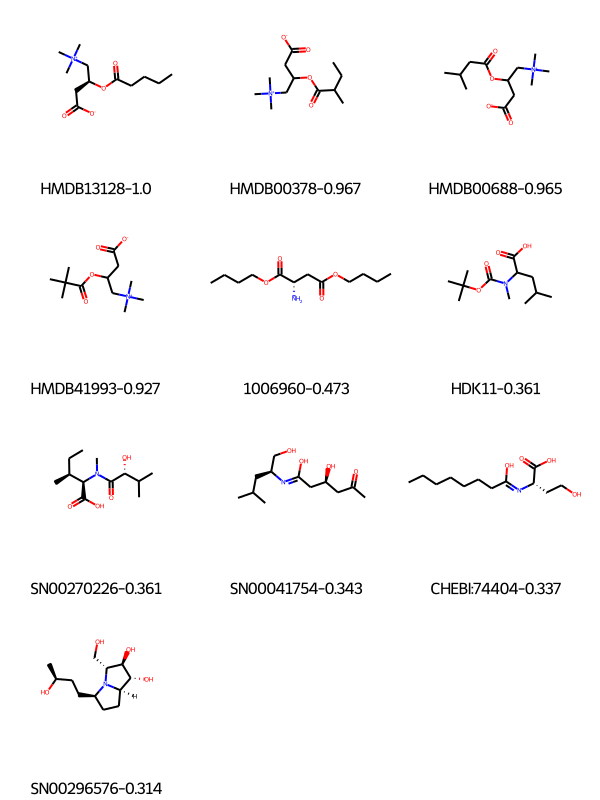

In [25]:
plotPannel(tlid, clusterid=40)

/home/rsilva/miniconda3/envs/chemwalker/lib/python3.7/site-packages/chemwalker-0.0.1-py3.7.egg/chemwalker/draw.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


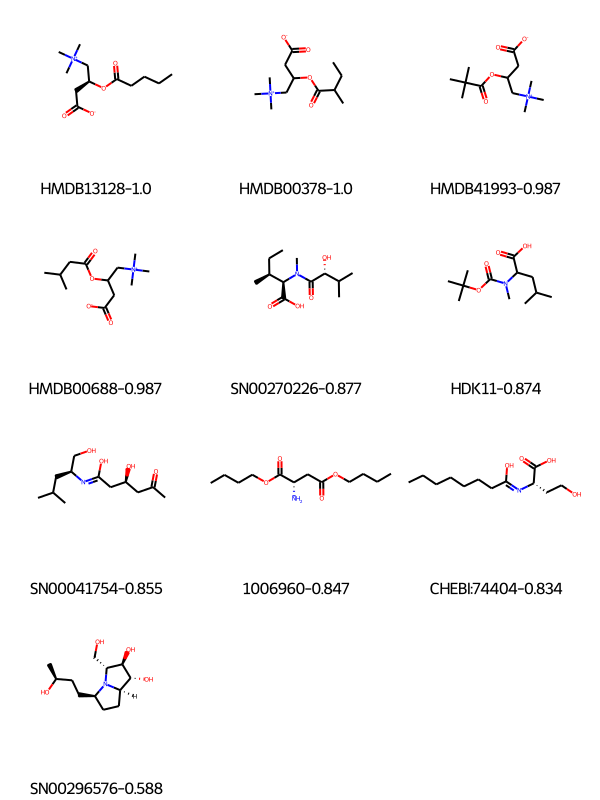

In [26]:
plotPannel(tlid, clusterid=40, score='Score')

In [ ]:
otabgnps.columns

In [28]:
if not os.path.exists('figs'):
    os.mkdir('figs')

plotGraph(otabgnps.copy(), gnps_tab.copy(), tlid, net, method='MF',
         dr='figs', comp=34, option=1, pos_scale=1000)
    
plotGraph(otabgnps.copy(), gnps_tab.copy(), tlid, net, method='RW',
         dr='figs', comp=34, option=1, pos_scale=1000)

In [33]:
if not os.path.exists('figs'):
    os.mkdir('figs')

plotGraph(otabgnps, gnps_tab.copy(), tlid, net, method='RW',
         dr='figs', clusterid=40, pos_scale=200)

plotGraph(otabgnps, gnps_tab.copy(), tlid, net, method='MF',
         dr='figs', clusterid=40, pos_scale=200)